# Analisi dei tweets

### Subset 2019

In [1]:
import pandas as pd
df = pd.read_csv('.../WeekTOT.csv', delimiter=',', skiprows=0, lineterminator='\n', low_memory=False)

In [2]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns=['date', 'user', 'timestamp', 'clean', 'pos', 'neg', 'neu', 'compound', 'value', 'week']
df

,date,user,timestamp,clean,pos,neg,neu,compound,value,week
0,2019-04-01,IGSquawk,2019-04-01 17:44:04+00,crypto update bitcoin ether ripple xrp bitcoin...,0.0000,0.0,1.000,0.000,bull\r\r,14
1,2019-04-01,jpy,2019-04-01 16:00:24+00,usd eur gbp aud nzd cny chf btc eth tue apr jst,0.0000,0.0,1.000,0.000,bull\r\r,14
2,2019-04-01,bt_exchange,2019-04-01 18:00:02+00,btc brl em ás bitcoin bitcoinbr bitcoinexchangebr,0.0000,0.0,1.000,0.000,bull\r\r,14
3,2019-04-01,NowBitcoinPrice,2019-04-01 17:32:11+00,apr utc € £ bitcoin btc pic twitter com pbmbyo...,0.0000,0.0,1.000,0.000,bull\r\r,14
4,2019-04-01,NowBitcoinPrice,2019-04-01 16:02:20+00,apr utc € £ bitcoin btc pic twitter com qlpqpaht,0.0000,0.0,1.000,0.000,bull\r\r,14
...,...,...,...,...,...,...,...,...,...,...
8792056,2019-11-23,xmr_btc,2019-11-23 05:40:02+00,xmr worth btc,0.2263,0.0,0.513,0.487,bull\r\r,47
8792057,2019-11-23,CoinCapsAi,2019-11-23 05:40:03+00,top cryptocurrencies alert time bitcoin ethere...,0.4588,0.0,0.750,0.250,bull\r\r,47
8792058,2019-11-23,ScrapeINT,2019-11-23 05:47:01+00,bitcoin ethereum bitcoin cash litecoin xrp iota,0.0000,0.0,1.000,0.000,bull\r\r,47
8792059,2019-11-23,MasterminingNet,2019-11-23 05:40:05+00,btc new hub relaunch newyorkcoin nyc pool mine...,0.0000,0.0,1.000,0.000,bull\r\r,47


In [3]:
pd.set_option('display.max_colwidth',700)

In [4]:
df['value'].value_counts()

bull\r\r    5283317
bear\r\r    3508744
Name: value, dtype: int64

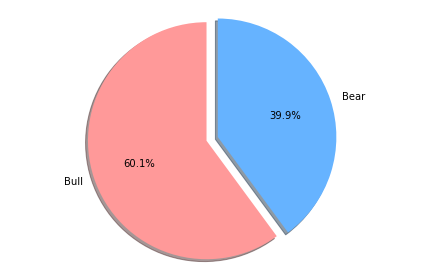

In [5]:
import matplotlib.pyplot as plt

labels = ['Bull', 'Bear']
sizes = [5283317, 3508744]
explode = (0, 0.1)
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show()

## Confronto tra bull/bear e parole "bull" e "bear"

In [6]:
#quanti tweets in generale hanno le parole "bull" e "bear"
dfBear=df[df.clean.str.contains('bear')]
dfBull=df[df.clean.str.contains('bull')]

In [7]:
dfBear.shape[0]

104631

In [8]:
dfBull.shape[0]

231158

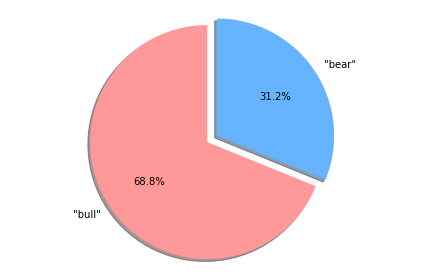

In [9]:
labels = ['"bull"', '"bear"']
sizes = [231158, 104631]
explode = (0, 0.1)
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show()

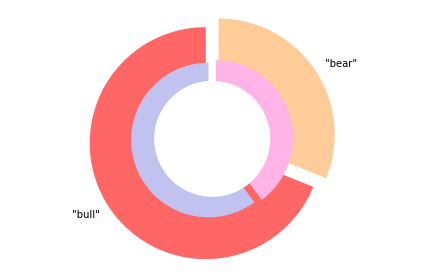

In [10]:
labels = ['"bull"', '"bear"']
sizes = [231158, 104631]
labels_gender = ['Bull', 'Bear']
sizes_gender = [5283317, 3508744]
colors = ['#ff6666', '#ffcc99']
colors_gender = ['#c2c2f0','#ffb3e6']
explode = (0.2,0.2) 
explode_gender = (0.1,0.1)

plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=3)
plt.pie(sizes_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=2 )

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [11]:
dfBearBear=dfBear[dfBear['value']=='bear\r\r']
dfBearBull=dfBear[dfBear['value']=='bull\r\r']

In [12]:
dfBearBear.shape[0]

44720

In [13]:
dfBearBull.shape[0]

59911

In [14]:
dfBullBear=dfBull[dfBull['value']=='bear\r\r']
dfBullBull=dfBull[dfBull['value']=='bull\r\r']

In [15]:
dfBullBear.shape[0]

83363

In [16]:
dfBullBull.shape[0]

147795

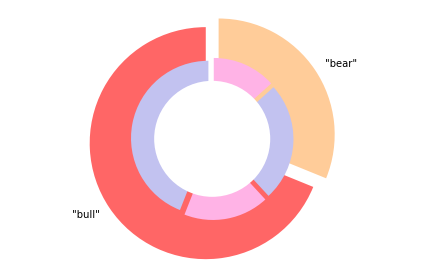

In [17]:
labels = ['"bull"', '"bear"']
sizes = [231158, 104631]
labels_gender = ['"bull"Bull', '"bear"Bull','"bull"Bear', '"bear"Bear']
sizes_gender = [147795, 59911, 83363, 44720]
colors = ['#ff6666', '#ffcc99']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1)

plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=3)
plt.pie(sizes_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=2 )

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

I tweets che contengono queste due parole rimangono comunque bilanciati secondo i valori di "value" (bull/bear). Considerando anche ciò, abbiamo selezionato il subset per i classificatori non dando troppo peso al contenuto testuale.

## WordCloud con tutte le parole

In [18]:
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

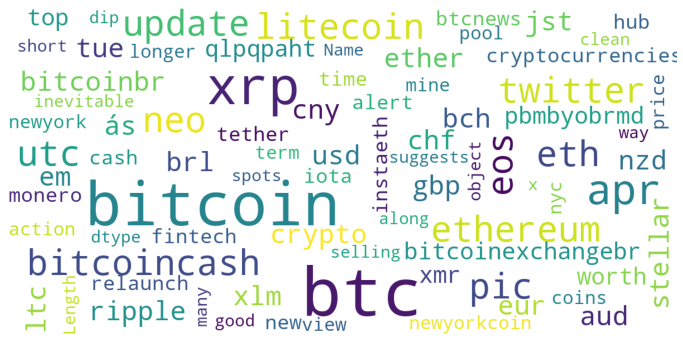

In [19]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
wordworld_text = df['clean']
show_wordcloud (wordworld_text)

## Ngrams con tutte le parole

In [22]:
import ngrams
from sklearn.feature_extraction.text import CountVectorizer

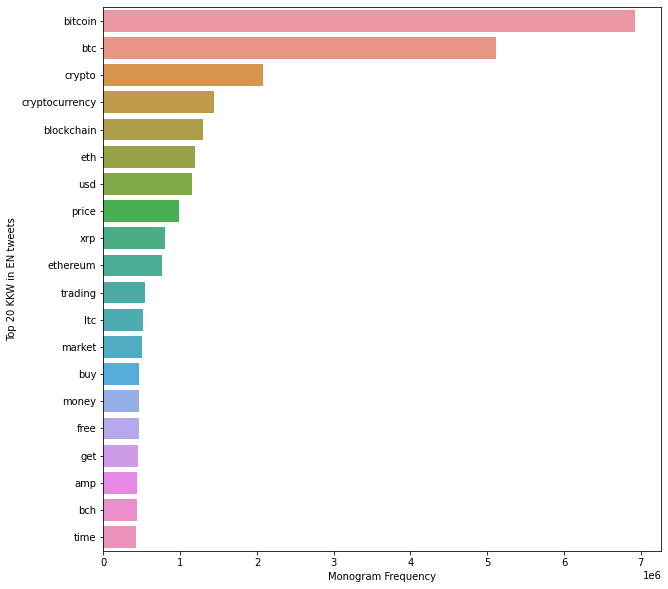

In [23]:
def plot_top_ngrams_barchart(text, n=1):

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Monogram Frequency")
    plt.ylabel("Top 20 KKW in EN tweets")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(df['clean'],1)

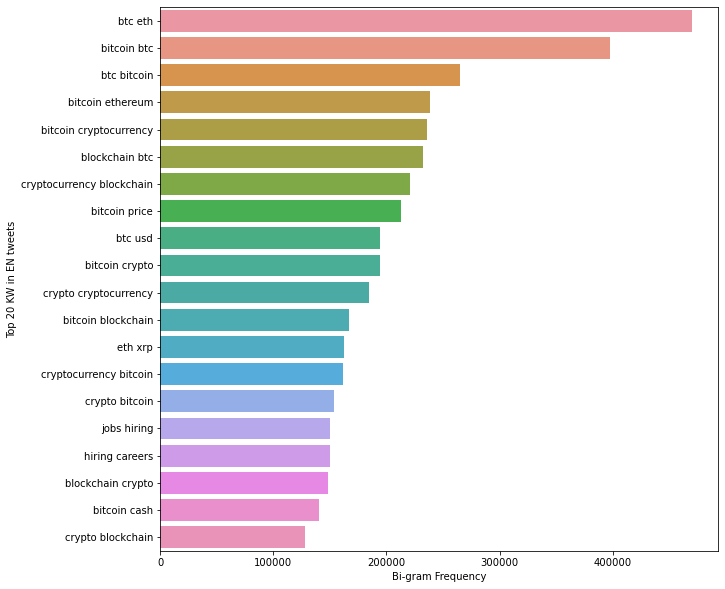

In [24]:
#Bi-grams

def plot_top_ngrams_barchart(text, n=2):

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 KW in EN tweets")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(df['clean'],2)

## Stessi procedimenti ma senza le parole contestuali più frequenti 

In [25]:
df['clean'] = df['clean'].str.replace('bitcoin|btc|eth|value|price|crypto', '')

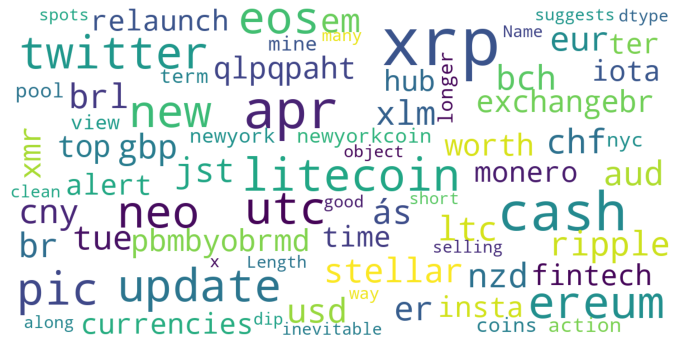

In [26]:
wordworld_text = df['clean']
show_wordcloud (wordworld_text)

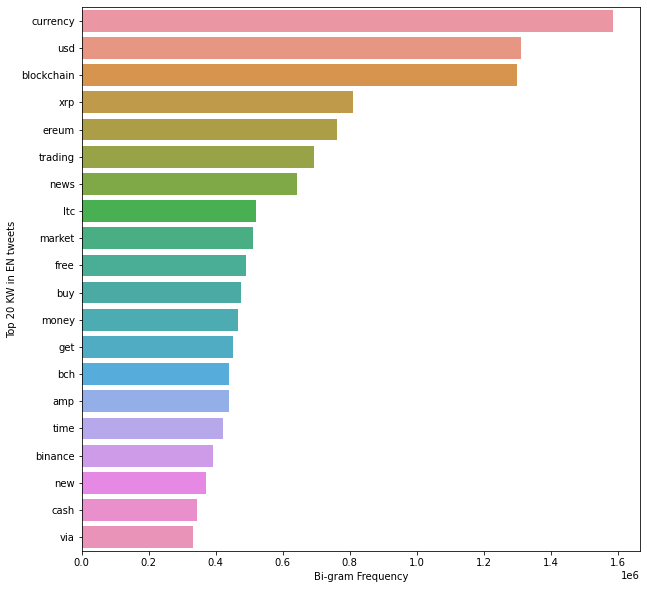

In [27]:
plot_top_ngrams_barchart(df['clean'],1)

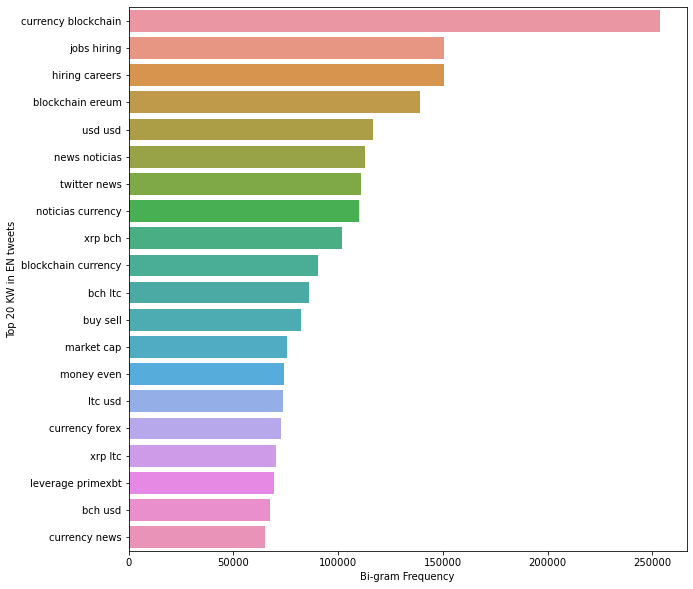

In [36]:
plot_top_ngrams_barchart(df['clean'],2)

## Bull vs Bear

In [37]:
dfBULL=df[df['value']=='bull\r\r']
dfBEAR=df[df['value']=='bear\r\r']

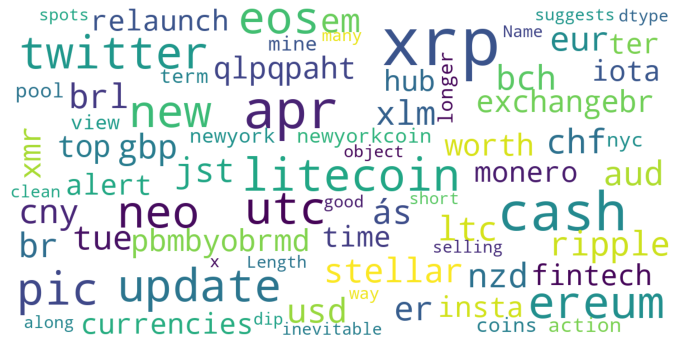

In [38]:
wordworld_text = dfBULL['clean']
show_wordcloud (wordworld_text)

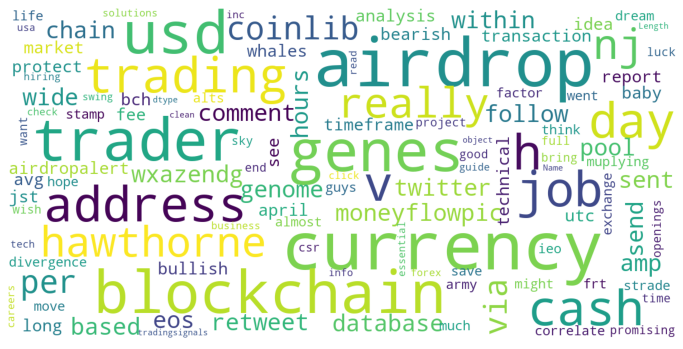

In [39]:
wordworld_text = dfBEAR['clean']
show_wordcloud (wordworld_text)

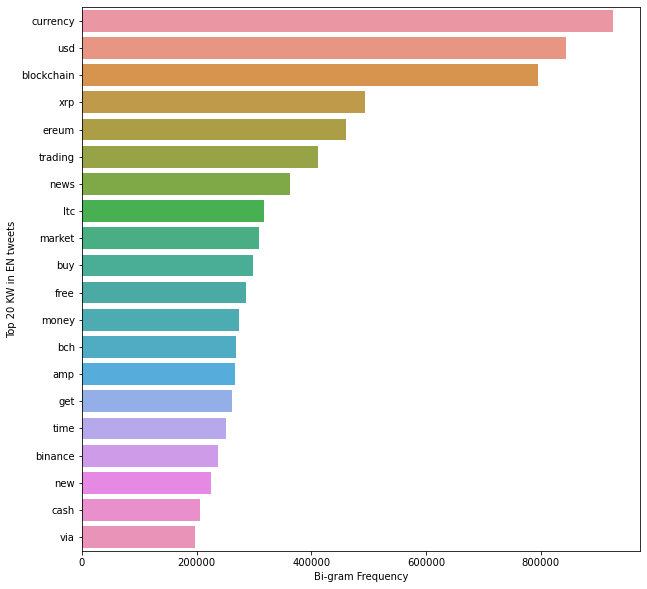

In [40]:
plot_top_ngrams_barchart(dfBULL['clean'],1)

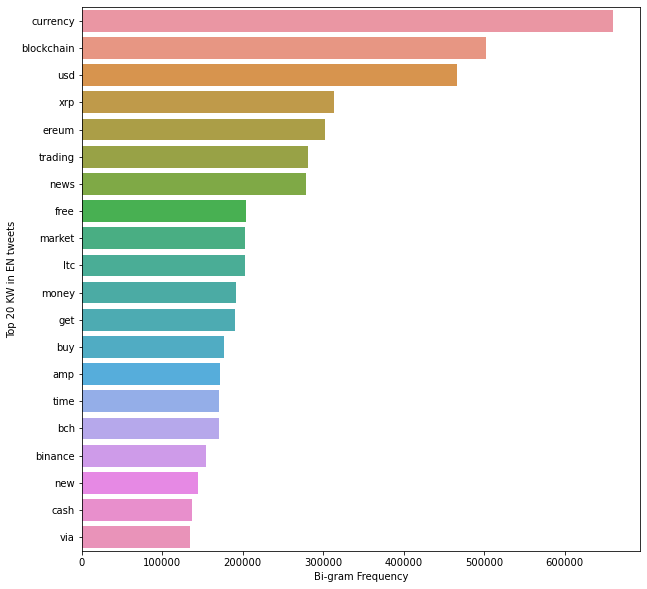

In [41]:
plot_top_ngrams_barchart(dfBEAR['clean'],1)